In [26]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from wordcloud import WordCloud

from funciones_varias import cargaCsvToDataFrame

dfMovies = cargaCsvToDataFrame("dfMovies", "datasets_eda")
dfCrew = cargaCsvToDataFrame("dfCrew", "datasets_eda")
dfCast = cargaCsvToDataFrame("dfCast", "datasets_eda")

In [16]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45379 entries, 0 to 45378
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0                       45379 non-null  object
 1   movie_title         45379 non-null  object
 2   budget              45379 non-null  object
 3   movie_genre         45379 non-null  object
 4   franquicia          45379 non-null  object
 5   id                  45379 non-null  object
 6   original_language   45379 non-null  object
 7   overview            45379 non-null  object
 8   popularity          45379 non-null  object
 9   production_company  45379 non-null  object
 10  production_country  45379 non-null  object
 11  release_date        45379 non-null  object
 12  release_year        45379 non-null  object
 13  revenue             45379 non-null  object
 14  runtime             45379 non-null  object
 15  language            45379 non-null  object
 16  status              45

In [17]:
dfMovies.describe()


#columnas con 50% o mas de valores en 0 --> budget, franquicia, revenue, tagline, return
#genero mas repetido: Drama; aproximadamente 25% de las peliculas son de Drama
#hay 3 ids 141971
#la columna status no parece muy util ya que mas del 95% de los valores son "Released"
#idioma mas repetido: Inglés (no es sorpresa). Aproximadamente un 70% de las peliculas son en inglés
#la columna overview puede ser de gran ayuda al modelo de categorizacion ya que tiene muchos valores unicos con muchas palabras claves

#para el modelo de machine learning considero que no necesito las siguientes columnas: tagline, id, status

,,movie_title,budget,movie_genre,franquicia,id,original_language,overview,popularity,production_company,...,release_date,release_year,revenue,runtime,language,status,tagline,vote_average,vote_count,return
count,45379,45379,45379,45379,45379,45379,45379,45379,45379,45379,...,45379,45379,45379,45379,45379,45379,45379,45379,45379,45379
unique,45379,42197,1223,24,1077,45349,93,44234,43733,10460,...,17333,135,6863,354,72,7,20270,93,1821,1256
top,0,Cinderella,0.0,Drama,,141971,en,,1e-06,,...,2008-01-01,2014,0.0,90.0,English,Released,,0.0,1,0.0
freq,1,11,36493,11944,42219,3,32202,941,56,12346,...,136,1974,37972,2549,26781,44936,24981,2947,3242,40060


In [18]:
dfMovies.duplicated().sum()

0

In [19]:
dfMovies["status"].value_counts() #no creo que me sirva mucho esta columna ya que tiene un nivel de variabilidad muy bajo

status
Released           44936
Rumored              230
Post Production       97
                      83
In Production         19
Planned               13
Canceled               1
Name: count, dtype: int64

In [20]:
dfMovies.isnull().sum()

                      0
movie_title           0
budget                0
movie_genre           0
franquicia            0
id                    0
original_language     0
overview              0
popularity            0
production_company    0
production_country    0
release_date          0
release_year          0
revenue               0
runtime               0
language              0
status                0
tagline               0
vote_average          0
vote_count            0
return                0
dtype: int64

In [21]:
dfMovies.dtypes

                      object
movie_title           object
budget                object
movie_genre           object
franquicia            object
id                    object
original_language     object
overview              object
popularity            object
production_company    object
production_country    object
release_date          object
release_year          object
revenue               object
runtime               object
language              object
status                object
tagline               object
vote_average          object
vote_count            object
return                object
dtype: object

In [49]:
#dropeo valor raro para poder analizar popularity
dfMovies.drop(dfMovies[dfMovies['popularity'] == 'Beware Of Frost Bites'].index, inplace=True)

dfMovies.replace("", 0, inplace=True)
dfMovies["budget"] = dfMovies["budget"].astype(float)
dfMovies["popularity"] = dfMovies["popularity"].astype(float) #tiene valor muy raro: 'Beware Of Frost Bites'
dfMovies["revenue"] = dfMovies["revenue"].astype(float)
dfMovies["runtime"] = dfMovies["runtime"].astype(float)
dfMovies["vote_average"] = dfMovies["vote_average"].astype(float)
dfMovies["return"] = dfMovies["return"].astype(float)



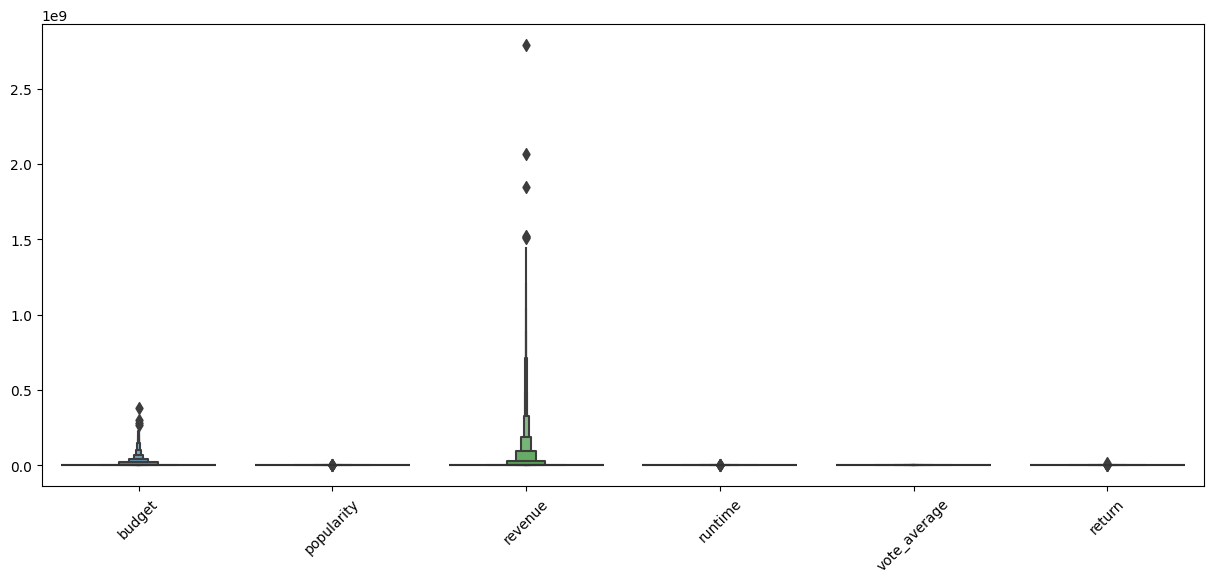

In [50]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
sns.boxenplot(data=dfMovies)
plt.show()

In [24]:

dfMovies["revenue"].describe()

count    4.537900e+04
mean     1.122936e+07
std      6.438789e+07
min      0.000000e+00
25%      0.000000e+00
50%      0.000000e+00
75%      0.000000e+00
max      2.787965e+09
Name: revenue, dtype: float64

,,movie_title,budget,movie_genre,franquicia,id,original_language,overview,popularity,production_company,...,release_date,release_year,revenue,runtime,language,status,tagline,vote_average,vote_count,return
19699,19714,Remember the Day,0.0,Carousel Productions,,56558,en,"Elderly schoolteacher Nora Trinell, waiting to...",0.049783,,...,1941-12-25,1941,0.0,86.0,,Released,,7.0,1,0.0


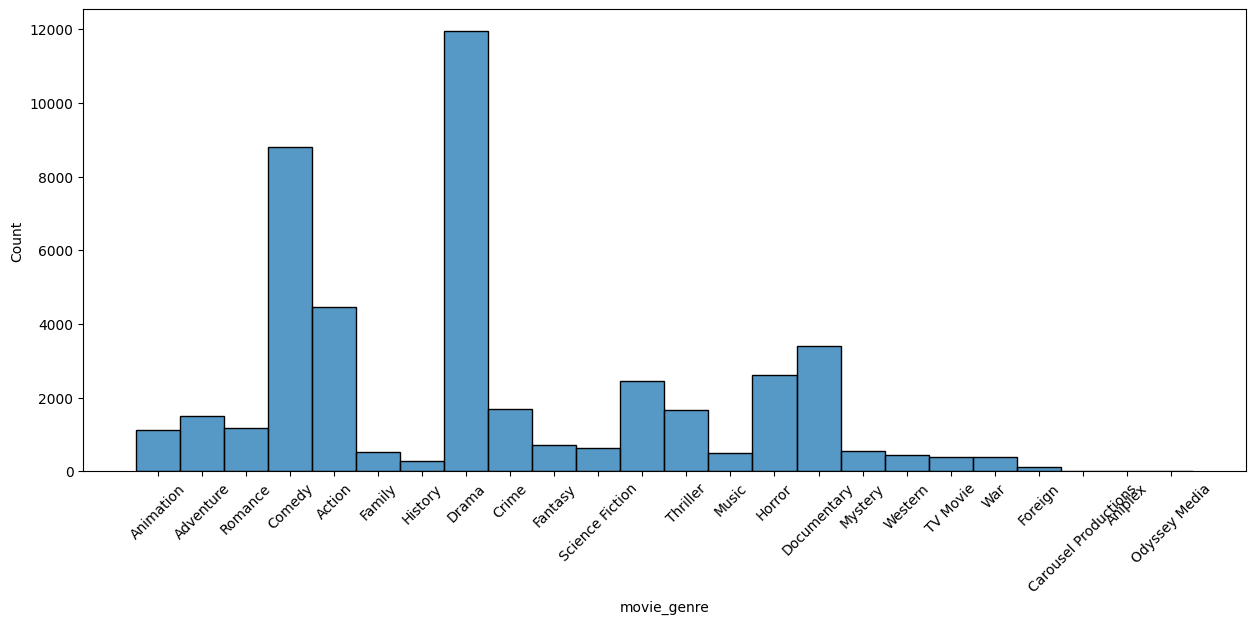

In [22]:
plt.figure(figsize=(15, 6))
plt.xticks(rotation=45)
sns.histplot(dfMovies["movie_genre"], bins=20)

#la mayoria de las peliculas son de drama o comedia
#Foreign es el genero con menor cantidad de peliculas
#se mezclaron 3 productoras de peliculas entre los generos; hay una pelicula con cada una de esas productoras como genero


dfMovies[dfMovies["movie_genre"]== "Aniplex"]
dfMovies[dfMovies["movie_genre"]== "Odyssey Media"]
dfMovies[dfMovies["movie_genre"]== "Carousel Productions"]


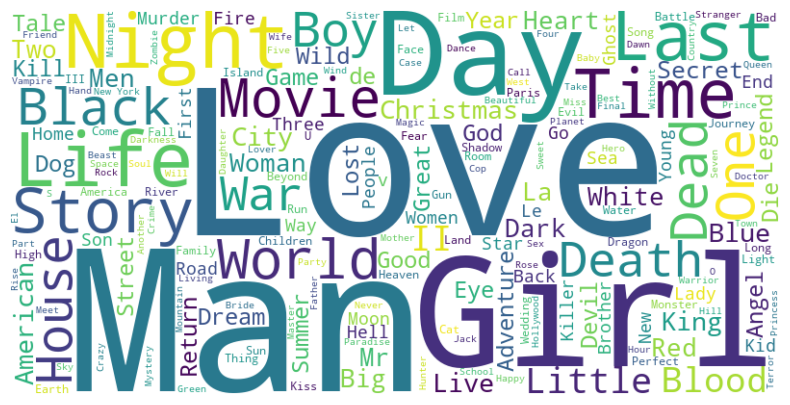

In [31]:
#nube de palabras para la columna title
#palabras mas repetidas: love, day, man, girl
titleStrings = " ".join(dfMovies["movie_title"])

wordCloud= WordCloud(width=800, height=400, background_color= 'white').generate(titleStrings)

plt.figure(figsize=(10, 5))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

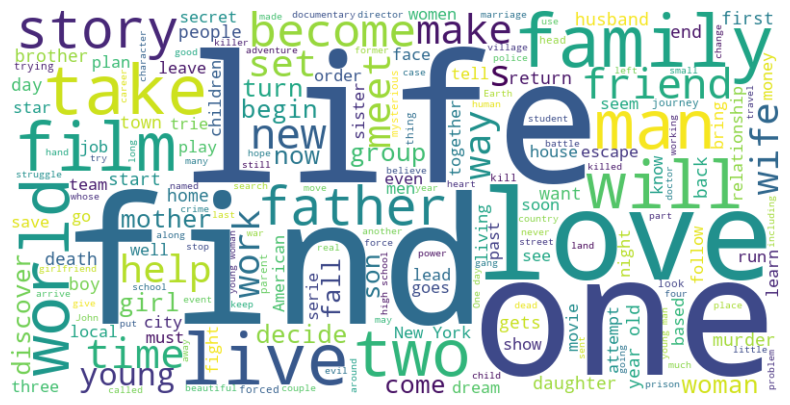

In [32]:
#nube de palabras para la columna overview
#palabras mas repetidas: life, find, love, one

titleStrings = " ".join(dfMovies["overview"])

wordCloud= WordCloud(width=800, height=400, background_color= 'white').generate(titleStrings)

plt.figure(figsize=(10, 5))
plt.imshow(wordCloud, interpolation='bilinear')
plt.axis('off')
plt.show()

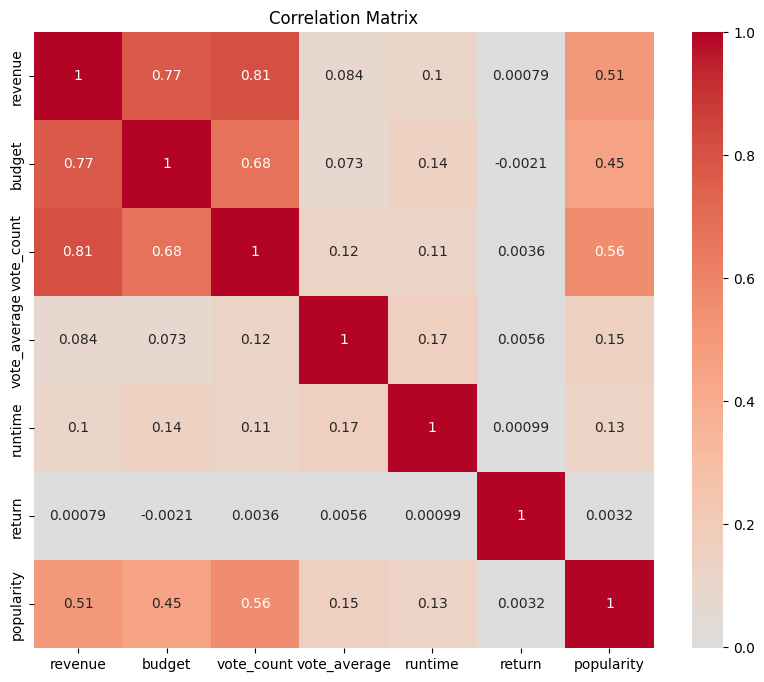

In [51]:
correlation_columns =["revenue", "budget", "vote_count", "vote_average", "runtime", "return", "popularity"]

dfCorrelation = dfMovies[correlation_columns]

correlation_matrix = dfCorrelation.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()


#si no interprete mal, mientras mayor es el vote_count mayor tiende a ser el revenue de una pelicula y visceversa,
# budget y revenue tambien tienen una  correlacion relativamente alta de 0,77

count    45378.000000
mean         5.623822
std          1.915744
min          0.000000
25%          5.000000
50%          6.000000
75%          6.800000
max         10.000000
Name: vote_average, dtype: float64